In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
dates = pd.date_range('1 July 2020', '27 July 2020')

In [12]:
# tempearatures
max_temperature = [23,25,24,26,28,22,22,28,20,25,21,20,24,29,26,19,21,26,30,23,22,22,23,25,25,24,25]
min_temperature = [17,16,16,15,19,13,12,13,14,12,11,10,11,13,16,12,11,13,16,15,11,12,13,14,17,16,16]

In [15]:
df = pd.DataFrame({"dates" : dates, "max_T": max_temperature, "min_T" : min_temperature})

In [16]:
df.head()

,dates,max_T,min_T
0,2020-07-01,23,17
1,2020-07-02,25,16
2,2020-07-03,24,16
3,2020-07-04,26,15
4,2020-07-05,28,19


In timeseries the dates usually is the index, specieal datetime index:

In [18]:
df.set_index(pd.to_datetime(df['dates']), inplace=True)

In [25]:
df.drop(['dates'], axis=1, inplace=True)

<AxesSubplot:xlabel='dates'>

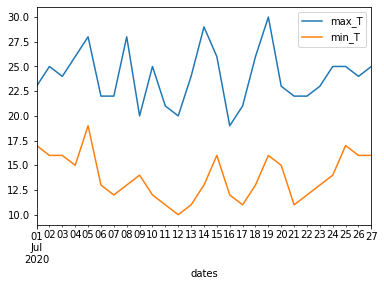

In [26]:
df.plot()

In [27]:
df.resample('3D').max()

,max_T,min_T
dates,,
2020-07-01,25,17
2020-07-04,28,19
2020-07-07,28,14
2020-07-10,25,12
2020-07-13,29,16
2020-07-16,26,13
2020-07-19,30,16
2020-07-22,25,14
2020-07-25,25,17


In [28]:
df.resample("8h").interpolate(method = 'linear')

,max_T,min_T
dates,,
2020-07-01 00:00:00,23.000000,17.000000
2020-07-01 08:00:00,23.666667,16.666667
2020-07-01 16:00:00,24.333333,16.333333
2020-07-02 00:00:00,25.000000,16.000000
2020-07-02 08:00:00,24.666667,16.000000
...,...,...
2020-07-25 16:00:00,24.333333,16.333333
2020-07-26 00:00:00,24.000000,16.000000
2020-07-26 08:00:00,24.333333,16.000000


<AxesSubplot:xlabel='dates'>

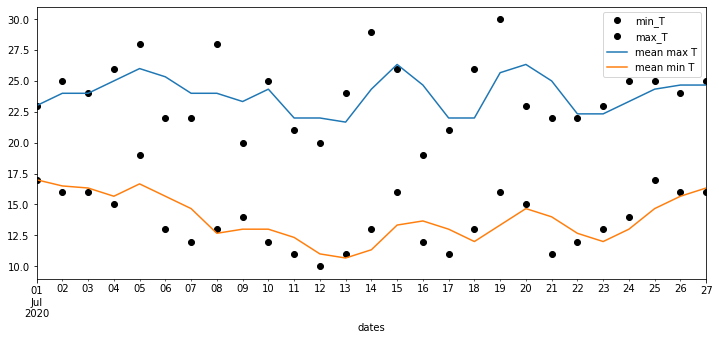

In [35]:
#plotting together:
ax = df.plot.line(y=['min_T', 'max_T'], figsize=(12,5), color='k', style='o')
df.rolling('3D').mean().rename(columns={'max_T': 'mean max T', 'min_T': 'mean min T'}).plot(ax=ax)
plt.label